In [1]:
import os, time,json
import tmdbsimple as tmdb 
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'title_akas_cleaned (1) (4).csv.gz',
 'title_basics_cleaned (1) (2) (1).csv.gz',
 'title_ratings_cleaned (1).csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2010.json',
 'tmdb_api_results_2011.json',
 'tmdb_api_results_2019.json',
 'tmdb_api_results_2020.json',
 'tmdb_results_combined (1).csv.gz']

In [2]:
import json
with open('/Users/awot1/.secret/tmdb_api.json' , 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['client-id', 'api-key'])

In [4]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [5]:
def get_movie_with_rating(movie_id):
    """Copied from Coding Dojo Learning Platform"""
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    # save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
            info['certification'] = c['certification']
    
    return info

In [6]:
test = get_movie_with_rating("tt0848228") #testing 
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 120.845,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [7]:
## testing our function by looping through a list of ids
import pandas as pd
test_ids = ["tt0848228", "tt0332280"]
results = []
errors = []
for movie_id in test_ids:
    
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)
        
    except Exception as e: 
        errors.append([movie_id, e])
    
pd.DataFrame(results)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.711,29009,PG-13
1,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.881,10507,PG-13


In [8]:
import os, time,json
import tmdbsimple as tmdb 
FOLDER = "data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'title_akas_cleaned (1) (4).csv.gz',
 'title_basics_cleaned (1) (2) (1).csv.gz',
 'title_ratings_cleaned (1).csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2010.json',
 'tmdb_api_results_2011.json',
 'tmdb_api_results_2019.json',
 'tmdb_api_results_2020.json',
 'tmdb_results_combined (1).csv.gz']

In [9]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)


In [10]:
basics = pd.read_csv(r"Data/title_basics_cleaned (1) (2) (1).csv.gz", low_memory = True,on_bad_lines='skip')
basics.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [33]:
YEARS_TO_GET = [2010,2011,2019,2020]

In [34]:
errors = [ ]

In [35]:
from tqdm.notebook import tqdm_notebook

In [36]:
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
        #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)
    # If it does not exist: create it
    if file_exists == False:
    # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)
            #Saving new year as the current df
    df = basics.loc[basics['startYear']==YEAR].copy()
    # saving movie ids to list
    movie_ids = df['tconst'].copy()
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
            #Get index and movie id from list
    # INNER Loop
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
            
        except Exception as e:
            errors.append([movie_id, e])
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/4 [00:00<?, ?it/s]

Movies from 2010:   0%|          | 0/3376 [00:00<?, ?it/s]

Movies from 2011:   0%|          | 0/4230 [00:00<?, ?it/s]

Movies from 2019:   0%|          | 0/5876 [00:00<?, ?it/s]

Movies from 2020:   0%|          | 0/5007 [00:00<?, ?it/s]

In [39]:
print(f"- Total errors: {len(errors)}") 

- Total errors: 4357


In [13]:
## Checking what data we already in our Data folder using os.listdir
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'title_akas_cleaned (1) (4).csv.gz',
 'title_basics_cleaned (1) (2) (1).csv.gz',
 'title_ratings_cleaned (1).csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2010.json',
 'tmdb_api_results_2011.json',
 'tmdb_api_results_2019.json',
 'tmdb_api_results_2020.json',
 'tmdb_results_combined (1).csv.gz']

In [14]:
import glob
## Make a filepath query
q = FOLDER+"*.csv.gz"
print(q)

Data/*.csv.gz


In [15]:
# Use glob.glob to get COMPLETE filepaths
file_list = glob.glob(q)
file_list

['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz',
 'Data\\title_akas_cleaned (1) (4).csv.gz',
 'Data\\title_basics_cleaned (1) (2) (1).csv.gz',
 'Data\\title_ratings_cleaned (1).csv.gz',
 'Data\\tmdb_results_combined (1).csv.gz']

In [48]:
## use a list comprehension to load in all files into 1 dataframe
df = pd.concat([pd.read_csv(f,lineterminator='\n') for f in file_list])
df

,imdb_id\r,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
1,NaN,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,\r
2,NaN,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,NaN,tt9904802,0.0,/tVa0v0iX7ksdfHtYdTdJglZWy5N.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",https://gooddeedentertainment.com/enemy-lines/,679796.0,en,...,0.0,92.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,Courage has no border.,Enemy Lines,0.0,5.552,29.0,\r
3960,NaN,tt9911196,0.0,/f1WhKsQZEPjOHQ4wTmlq75z0RF6.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,591915.0,nl,...,0.0,103.0,"[{'english_name': 'Dutch', 'iso_639_1': 'nl', ...",Released,NaN,The Marriage Escape,0.0,7.824,33.0,\r
3961,NaN,tt9914192,0.0,/xqtn8b1vIFpdTKjPfLxTuKQxxEl.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,669329.0,pt,...,0.0,98.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,NaN,No Gogó do Paulinho,0.0,4.500,37.0,\r
3962,NaN,tt9916190,0.0,/d98qmYGL6S7ku7txjBvE8Zy0SMQ.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,633490.0,en,...,0.0,94.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Protecting your family comes at a cost.,Safeguard,0.0,6.500,2.0,\r


In [49]:
df=df.drop('imdb_id\r',axis=1)
#df = df.drop('column_name', axis=1)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
1,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,\r
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13\r


In [50]:
# remove ids that are 0
df = df.loc[ df['imdb_id']!='0']
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,\r
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13\r
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,tt9904802,0.0,/tVa0v0iX7ksdfHtYdTdJglZWy5N.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",https://gooddeedentertainment.com/enemy-lines/,679796.0,en,Enemy Lines,...,0.0,92.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,Courage has no border.,Enemy Lines,0.0,5.552,29.0,\r
3960,tt9911196,0.0,/f1WhKsQZEPjOHQ4wTmlq75z0RF6.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,591915.0,nl,De Beentjes van Sint-Hildegard,...,0.0,103.0,"[{'english_name': 'Dutch', 'iso_639_1': 'nl', ...",Released,NaN,The Marriage Escape,0.0,7.824,33.0,\r
3961,tt9914192,0.0,/xqtn8b1vIFpdTKjPfLxTuKQxxEl.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,669329.0,pt,No Gogó do Paulinho,...,0.0,98.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,NaN,No Gogó do Paulinho,0.0,4.500,37.0,\r
3962,tt9916190,0.0,/d98qmYGL6S7ku7txjBvE8Zy0SMQ.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,633490.0,en,Safeguard,...,0.0,94.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Protecting your family comes at a cost.,Safeguard,0.0,6.500,2.0,\r


In [51]:
df=df.dropna(subset='imdb_id')

In [52]:
df = df.reset_index(drop=True)
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,\r
1,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13\r
2,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,\r
3,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.000,5.0,\r
4,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,...,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.596,10448.0,PG\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,tt9904802,0.0,/tVa0v0iX7ksdfHtYdTdJglZWy5N.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",https://gooddeedentertainment.com/enemy-lines/,679796.0,en,Enemy Lines,...,0.0,92.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,Courage has no border.,Enemy Lines,0.0,5.552,29.0,\r
14613,tt9911196,0.0,/f1WhKsQZEPjOHQ4wTmlq75z0RF6.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,591915.0,nl,De Beentjes van Sint-Hildegard,...,0.0,103.0,"[{'english_name': 'Dutch', 'iso_639_1': 'nl', ...",Released,NaN,The Marriage Escape,0.0,7.824,33.0,\r
14614,tt9914192,0.0,/xqtn8b1vIFpdTKjPfLxTuKQxxEl.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,669329.0,pt,No Gogó do Paulinho,...,0.0,98.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,NaN,No Gogó do Paulinho,0.0,4.500,37.0,\r
14615,tt9916190,0.0,/d98qmYGL6S7ku7txjBvE8Zy0SMQ.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,633490.0,en,Safeguard,...,0.0,94.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Protecting your family comes at a cost.,Safeguard,0.0,6.500,2.0,\r


In [53]:
## saving the combined csv to disk
df.to_csv(FOLDER+'combined_tmdb_data.csv.gz',compression='gzip',index=False)

df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r\r
0,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,\r\r
1,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13\r\r
2,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,\r\r
3,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.000,5.0,\r\r
4,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,...,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.596,10448.0,PG\r\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,tt9904802,0.0,/tVa0v0iX7ksdfHtYdTdJglZWy5N.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",https://gooddeedentertainment.com/enemy-lines/,679796.0,en,Enemy Lines,...,0.0,92.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,Courage has no border.,Enemy Lines,0.0,5.552,29.0,\r\r
14613,tt9911196,0.0,/f1WhKsQZEPjOHQ4wTmlq75z0RF6.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,591915.0,nl,De Beentjes van Sint-Hildegard,...,0.0,103.0,"[{'english_name': 'Dutch', 'iso_639_1': 'nl', ...",Released,NaN,The Marriage Escape,0.0,7.824,33.0,\r\r
14614,tt9914192,0.0,/xqtn8b1vIFpdTKjPfLxTuKQxxEl.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,669329.0,pt,No Gogó do Paulinho,...,0.0,98.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,NaN,No Gogó do Paulinho,0.0,4.500,37.0,\r\r
14615,tt9916190,0.0,/d98qmYGL6S7ku7txjBvE8Zy0SMQ.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,633490.0,en,Safeguard,...,0.0,94.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Protecting your family comes at a cost.,Safeguard,0.0,6.500,2.0,\r\r


In [55]:
df['certification\r\r'].unique()

array(['\r\r', 'PG-13\r\r', 'PG\r\r', 'R\r\r', 'NR\r\r', 'G\r\r',
       'NC-17\r\r'], dtype=object)

In [59]:
# fix extra space certs
df['certification'] = df['certification\r\r'].str.strip()

In [61]:
df['certification'] .head(10)

0         
1    PG-13
2         
3         
4       PG
5         
6        R
7       NR
8        R
9    PG-13
Name: certification, dtype: object

# Questions to Answer
#### The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

- They want you to perform a statistical test to get a mathematically-supported answer.
- They want you to report if you found a significant difference between ratings.
    - If so, what was the p-value of your analysis?
And which rating earns the most revenue?
- They want you to prepare a visualization that supports your finding.

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='certification', ylabel='revenue'>

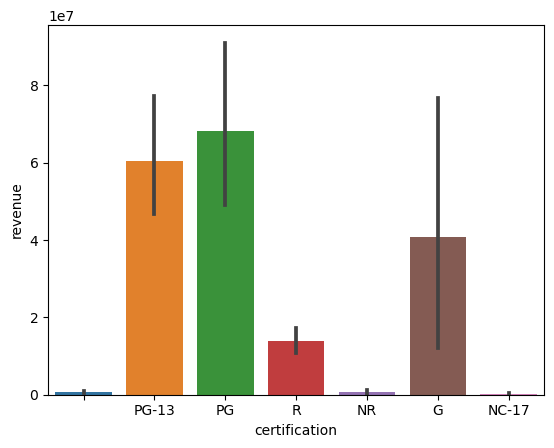

In [64]:
sns.barplot(data=df, x='certification', y='revenue')

PG movies seems to have much higher revenue than the other movies, PG also has higher revenue next to PG movies, and G has also higher revenue, R,NR AND NC-17 has much lower revenues compared to the others so it does mean that revenues of the movies are related to certification of a movie.

let's see it further, since we are going to be comparing the revenues of different movies, it's going to be numerical data with more than 2 samples, so i am going to test ANOVA test. 
(Null Hypothesis): the revenue of movies does not depend on the certification of movies.

(Alternative Hypothesis): the revenue of movies depends on the certification of movies.
For numeric data, the assumptions are usually:
- No significant outliers
- Normally distributed groups
- Equal Variance between group


In [80]:
import scipy.stats as stats
import numpy as np

In [68]:
df1=df.loc[df['certification']=='PG-13']

In [69]:
df2=df.loc[df['certification']=='PG']

In [70]:
df3=df.loc[df['certification']=='R']

In [71]:
df4=df.loc[df['certification']=='NR']

In [76]:
df5=df.loc[df['certification']=='G']

In [72]:
df6=df.loc[df['certification']=='NC-17']

In [74]:
df1_revenue=df1['revenue']

In [77]:
df2_revenue=df2['revenue']
df3_revenue=df3['revenue']
df4_revenue=df4['revenue']
df5_revenue=df5['revenue']
df6_revenue=df6['revenue']

Check for and remove outliers

In [81]:
zscores= stats.zscore(df1_revenue)
outliers = abs(zscores)>3
np.sum(outliers)

15

In [90]:

df1_revenue = df1_revenue[(np.abs(stats.zscore(df1_revenue)) < 3)]

In [89]:
zscores= stats.zscore(df2_revenue)
outliers = abs(zscores)>3
np.sum(outliers)

12

In [91]:

df2_revenue = df2_revenue[(np.abs(stats.zscore(df2_revenue)) < 3)]

In [92]:
zscores= stats.zscore(df3_revenue)
outliers = abs(zscores)>3
np.sum(outliers)

25

In [93]:

df3_revenue = df3_revenue[(np.abs(stats.zscore(df3_revenue)) < 3)]

In [96]:
zscores= stats.zscore(df4_revenue)
outliers = abs(zscores)>3
np.sum(outliers)

10

In [94]:

df4_revenue = df4_revenue[(np.abs(stats.zscore(df4_revenue)) < 3)]

In [95]:
zscores= stats.zscore(df5_revenue)
outliers = abs(zscores)>3
np.sum(outliers)

3

In [97]:

df5_revenue = df5_revenue[(np.abs(stats.zscore(df5_revenue)) < 3)]

In [98]:
zscores= stats.zscore(df6_revenue)
outliers = abs(zscores)>3
np.sum(outliers)

1

In [99]:

df6_revenue = df6_revenue[(np.abs(stats.zscore(df6_revenue)) < 3)]

#Check for Normality

In [100]:
# test the  group for normality
norm_df1 = stats.normaltest(df1_revenue)
norm_df1

NormaltestResult(statistic=467.87762494987624, pvalue=2.5215329005446365e-102)

In [103]:
norm_df2 = stats.normaltest(df2_revenue)
norm_df2

NormaltestResult(statistic=188.67125158810916, pvalue=1.0728975924588013e-41)

In [104]:
norm_df3 = stats.normaltest(df3_revenue)
norm_df3

NormaltestResult(statistic=1070.1790286455657, pvalue=4.107490856306389e-233)

In [105]:
norm_df4 = stats.normaltest(df1_revenue)
norm_df4

NormaltestResult(statistic=467.87762494987624, pvalue=2.5215329005446365e-102)

In [106]:
norm_df5 = stats.normaltest(df1_revenue)
norm_df5

NormaltestResult(statistic=467.87762494987624, pvalue=2.5215329005446365e-102)

In [107]:
norm_df6 = stats.normaltest(df1_revenue)
norm_df6

NormaltestResult(statistic=467.87762494987624, pvalue=2.5215329005446365e-102)

the results are well below 0.05, which means our data is NOT normally distributed.However, our sample size is large enough to proceed without satisfying this test. For sample T-test, sample sizes of 15 per group are considered sufficient.

In [ ]:
#Check for Equal Variance

In [109]:
result = stats.levene(df1_revenue,df2_revenue,df3_revenue,df4_revenue,df5_revenue,df6_revenue)
result

LeveneResult(statistic=56.833792558994254, pvalue=1.3681693032495587e-56)

we have not met the assumption of equal variance, it means that there are significant difference in revenues between the groups

In [110]:
result = stats.f_oneway(df1_revenue,df2_revenue,df3_revenue,df4_revenue,df5_revenue,df6_revenue)
result

F_onewayResult(statistic=56.83379255899424, pvalue=1.3681693032495587e-56)

it can be seen that there is a significant difference between the groups of the movies so we reject our null hypothesis accept the alternative hypothesis

## ADDITIONAL HYPOTHESIS
### Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

(Null Hypothesis): movies that are over 2.5 hours long do not earn more revenue than movies that are 1.5 hours long (or less)?

(Alternative Hypothesis): movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less). since it has two samples, and is numberic, it is 2sample T-test
For numeric data, the assumptions are usually:

No significant outliers
Normally distributed groups
Equal Variance between group

In [115]:
df['runtime']=df['runtime'].astype("int")

In [119]:
df['runtime']

0         45
1         90
2          0
3         98
4        100
        ... 
14612     92
14613    103
14614     98
14615     94
14616     92
Name: runtime, Length: 14617, dtype: int32

<Axes: xlabel='revenue', ylabel='runtime'>

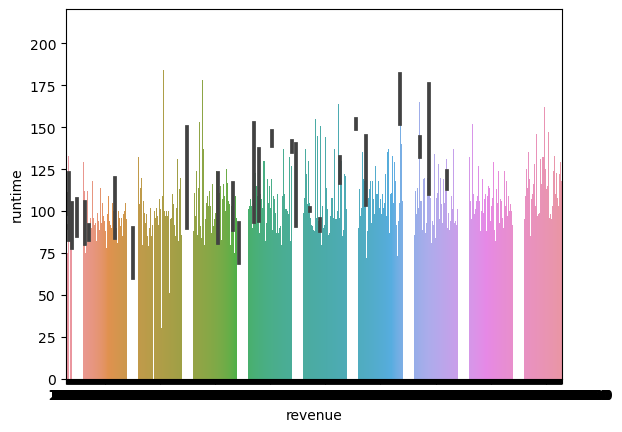

In [215]:
sns.barplot(data=df, x='revenue',y='runtime')

<Axes: xlabel='revenue', ylabel='runtime'>

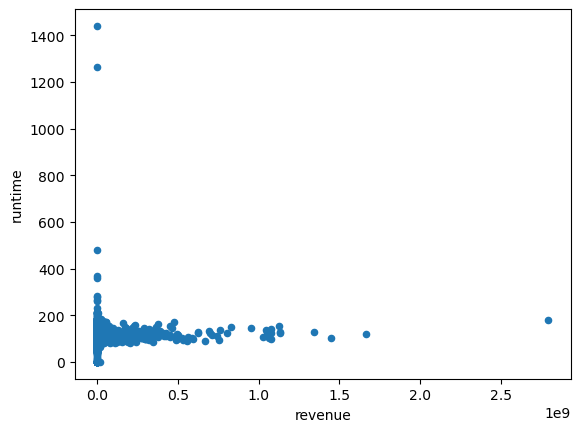

In [219]:
df.plot.scatter(x='revenue', y='runtime', cmap='viridis')

In [121]:
df_runtime1=df.loc[df["runtime"]>150]

In [234]:
df_runtime1.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r\r,certification
5,tt0403645,0.0,/bQ1vPhjXt2DQetGOJVF1gxzilDD.jpg,"{'id': 23170, 'name': 'Burnt by the Sun Trilog...",55000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.predstoyanie.ru/,38318.0,ru,Утомлённые солнцем 2: Предстояние,...,180,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Burnt by the Sun 2: Exodus,0.0,5.31,42.0,\r\r,
269,tt1182884,0.0,NaN,NaN,5600000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,29888.0,hi,दुल्हा मिल गया,...,152,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Dulha Mil Gaya,0.0,5.19,29.0,PG\r\r,PG
275,tt1185412,0.0,/vz1D3veOdcvwrA21iIkmamhxMa2.jpg,NaN,1250000.0,"[{'id': 28, 'name': 'Action'}, {'id': 10749, '...",NaN,30886.0,hi,वीर,...,160,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Veer,0.0,5.20,40.0,\r\r,
282,tt1188996,0.0,/fpgSkuEG2eV9nOHAYzqfOg1R8t2.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,26022.0,hi,My Name Is Khan,...,165,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"An Ordinary Man, An Extraordinary Journey ... ...",My Name Is Khan,0.0,8.05,1180.0,PG-13\r\r,PG-13
426,tt1264889,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,110936.0,sr,Kao rani mraz,...,168,"[{'english_name': 'Serbian', 'iso_639_1': 'sr'...",Released,NaN,An Early Frost,0.0,3.80,2.0,\r\r,


In [250]:
df_runtime1_revenue=df_runtime1['revenue']

In [251]:
df_runtime1_revenue.head()

5             0.0
269     2700000.0
275           0.0
282    42345360.0
426           0.0
Name: revenue, dtype: float64

In [120]:
df_runtime2=df.loc[df["runtime"]<=90]

In [252]:
df_runtime2_revenue=df_runtime2['revenue']

In [253]:
df_runtime2_revenue.head()

0     0.0
1     0.0
2     0.0
12    0.0
16    0.0
Name: revenue, dtype: float64

In [196]:
df_total=pd.concat([df_runtime1_revenue,df_runtime2_revenue], axis=1)

In [231]:
df_runtime1_revenue=df_runtime1_revenue.astype(int)

In [232]:
df_total.head()

,revenue1,revenue2
5,0.0,NaN
269,2700000.0,NaN
275,0.0,NaN
282,42345360.0,NaN
426,0.0,NaN


In [211]:
df_rev1=df_total['revenue1'].sum()
df_rev1

6664019636.0

In [212]:
df_rev2=df_total['revenue2'].sum()
df_rev2

4581272852.0

in here we can see that there is a 2 billion dollars differnce in length of the run time of movies.

In [ ]:
#Check for and remove outliers

In [241]:
zscores= stats.zscore(df_runtime1_revenue)
outliers = abs(zscores)>3
np.sum(outliers)

revenue1    2
dtype: int64

In [242]:
df1_revenue = df_runtime1_revenue[(np.abs(stats.zscore(df_runtime1_revenue)) < 3)]

In [245]:
zscores= stats.zscore(df_runtime2_revenue)
outliers = abs(zscores)>3
np.sum(outliers)

revenue2    36
dtype: int64

In [246]:
df2_revenue = df_runtime2_revenue[(np.abs(stats.zscore(df_runtime2_revenue)) < 3)]

In [256]:
# test the  group for normality
norm_rev1 = stats.normaltest(df_runtime1_revenue)
norm_rev1

NormaltestResult(statistic=491.7097432538118, pvalue=1.6849456758904505e-107)

In [255]:
# test the  group for normality
norm_rev2 = stats.normaltest(df_runtime2_revenue)
norm_rev2

NormaltestResult(statistic=16899.096911088087, pvalue=0.0)

In [ ]:
#Check for Equal Variance

In [254]:
# Test for equal variance
result = stats.levene(df_runtime1_revenue, df_runtime2_revenue)
result

LeveneResult(statistic=104.7727478753212, pvalue=2.0718263399600354e-24)

it can be seen in here that there is significant difference between the movies that are over 2.5 hours and movies that are 1.5 hours long so we will reject the null hypothesis and accept the alternative hypothesis.

## ADDITIONAL HYPOTHESIS

## Do movies released in 2010 earn less revenue than movies released in 2019?
How do the years compare for movie ratings?

(Null Hypothesis): movies released in 2010 do not earn less revenue than movies released in 2019?

(Alternative Hypothesis): movies that are released in 2010 earn less revenue than movies released in 2019.
since we are comparing 
- No significant outliers
- Normally distributed groups
- Equal Variance between group